In [1]:
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


label-studio
D:\virtual_environment_2\label_maker
pip install -U label-studio 

Convert to binary for single image

In [2]:
import os
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [13]:
test_img = io.imread("iris_dataset/images/Img_1_1_1.jpg")

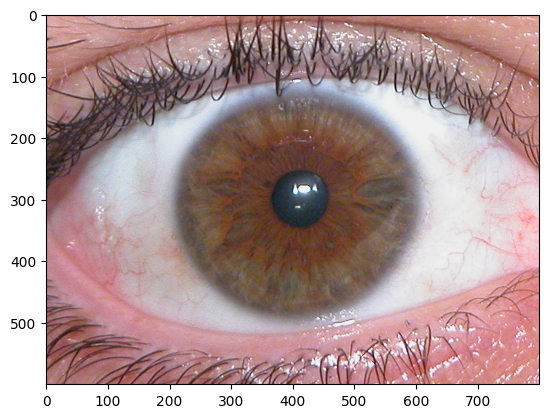

In [14]:
plt.imshow(test_img)

In [15]:
print(test_img.shape)

(600, 800, 3)


In [9]:
test_mask_png = io.imread("iris_dataset/mask_8_bit_scale/Img_1_1_1.png")

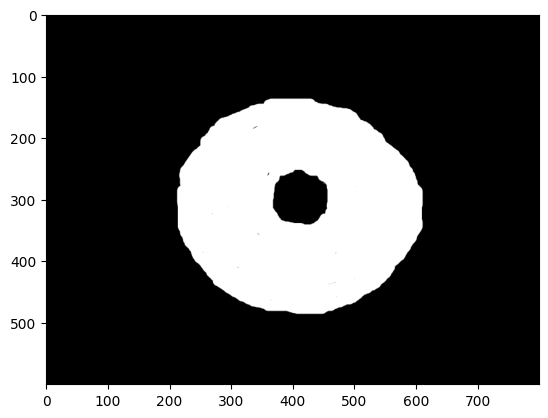

In [10]:
plt.imshow(test_mask_png, cmap='gray')

In [16]:
print(test_mask_png.shape)

(600, 800)


In [17]:
print(np.unique(test_mask_png))

[  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 159 160 161 162 163 164 165
 166 167 168 169 171 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 25

In [18]:
my_mask = np.where(test_mask_png>0, 1, test_mask_png)


In [19]:
print(np.unique(my_mask))

[0 1]


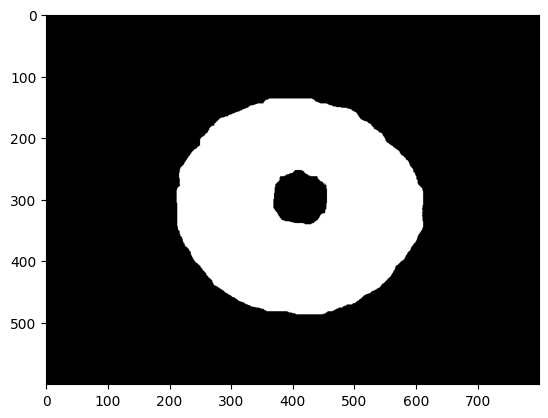

In [20]:
plt.imshow(my_mask, cmap='gray')

convert to binary multiple images

binary image file for files 1-30 using for loop

In [ ]:
#conversion of 0-255(8-bit scale) files to 0-1

# path to mask and binary_mask in the below link

# https://drive.google.com/drive/folders/1uVRoUek0hie1IL7rPHwV-pscwSG97Lfk?usp=sharing

for i in range(1,31):
    i =str(i)
    label_folder = "image_and_mask/season1/"+ i + "/mask"  #please change values here to change the folder number for image
    iris_masks = []
    new_directory = "image_and_mask/season1/"+ i + "/binary_images" #please change values here to change the folder number for mask
    for filename in os.listdir(label_folder):
        print(filename)
        
        iris_mask = io.imread(os.path.join(label_folder, filename))

        # iris_mask = io.imread(label_folder + filename)
        iris_mask = np.where(iris_mask>0, 1, iris_mask)
        iris_masks.append(iris_mask)
        new_file_path = os.path.join(new_directory, filename)
        io.imsave(new_file_path, iris_mask)


semantic segmenatation

coding for for semantic segmenation starts

In [1]:
# import the necessary libraries
from u_net_model import u_net_model


In [2]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# path to images and binary_mask in the below link
#  https://drive.google.com/drive/folders/1eMvjxhLRqXBVT5raiZPyb9IEghD0Lu-6?usp=sharing

image_directory = "iris_dataset/images"
mask_directory = "iris_dataset/binary_mask"

In [4]:
SIZE = 512
image_dataset = []
mask_dataset = [] 

In [5]:
images = os.listdir(image_directory)

for i, image_name in enumerate(images):
    if (image_name.split(".")[1] == "jpg"):
        # print(image_directory + image_name)
        image_path = os.path.join(image_directory, image_name)
        image = cv2.imread(image_path, 0)
        print(image)
        image = Image.fromarray(image)
        image = image.resize((SIZE,SIZE))
        image_dataset.append(np.array(image))



[[ 63  64  58 ... 126 133 115]
 [ 54  55  51 ... 100 117 122]
 [ 59  56  56 ...  79  86  94]
 ...
 [171 171 171 ... 225 223 221]
 [170 168 169 ... 193 198 207]
 [171 175 172 ... 204 197 204]]
[[ 85  83  79 ...  71 108 126]
 [ 76  70  65 ...  56  93 130]
 [ 68  61  58 ...  53  84 118]
 ...
 [171 164 162 ... 192 204 194]
 [174 168 170 ... 182 178 179]
 [167 167 178 ... 180 186 179]]
[[ 47  39  32 ... 157 157 162]
 [ 51  37  32 ... 160 154 153]
 [ 43  39  42 ... 155 150 155]
 ...
 [162 168 167 ... 185 183 172]
 [161 166 167 ... 187 186 174]
 [169 163 163 ... 183 185 179]]
[[ 48  51  53 ... 156 160 157]
 [ 43  49  54 ... 154 144 157]
 [ 51  53  55 ... 172 162 166]
 ...
 [160 165 165 ... 191 190 186]
 [167 167 165 ... 193 189 178]
 [162 166 165 ... 175 181 182]]
[[ 54  45  42 ... 144 149 164]
 [ 59  60  55 ... 143 143 150]
 [ 99  86  81 ... 133 137 133]
 ...
 [159 162 155 ... 179 181 187]
 [165 163 167 ... 181 187 188]
 [174 159 162 ... 176 180 172]]
[[187 161 182 ... 149 159 169]
 [190 199

In [6]:
print(len(image_dataset))

150


In [7]:
masks = os.listdir(mask_directory)

for i, mask_name in enumerate(masks):
    if (mask_name.split(".")[1] == "png"):
        # print(image_directory + image_name)
        mask_path = os.path.join(mask_directory, mask_name)
        mask = cv2.imread(mask_path, 0)
        mask = Image.fromarray(mask)
        mask = mask.resize((SIZE,SIZE))
        mask_dataset.append(np.array(mask))

In [8]:
print(len(mask_dataset))

150


In [9]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1), 3)

In [11]:
print(image_dataset.shape)

(150, 512, 512, 1)


In [12]:
mask_dataset = np.expand_dims((np.array(mask_dataset)), 3)

In [13]:
print(mask_dataset.shape)

(150, 512, 512, 1)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset,mask_dataset,test_size=0.10, random_state=0)

In [15]:
print("X_Train = ",x_train.shape)
print("X_Test = ",x_test.shape)
print("Y_Train = ",y_train.shape)
print("Y_Test = ",y_test.shape)

X_Train =  (135, 512, 512, 1)
X_Test =  (15, 512, 512, 1)
Y_Train =  (135, 512, 512, 1)
Y_Test =  (15, 512, 512, 1)


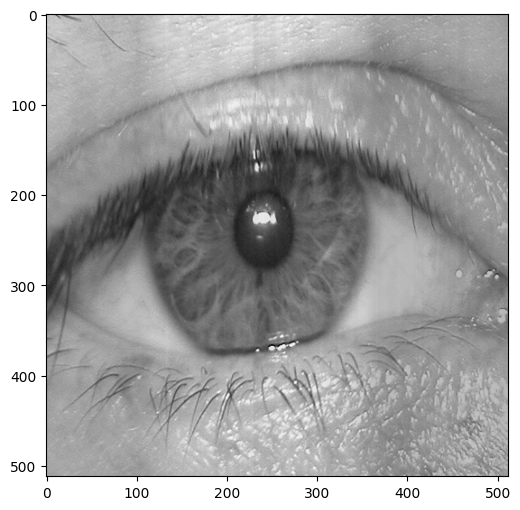

In [18]:
import random
image_number = random.randint(0, len(x_train))
plt.figure(figsize=(6,6))
plt.imshow(np.reshape(x_train[image_number], (512,512)), cmap='gray')
plt.show()

# plt.imshow(np.reshape(y_train[image_number], (512,512)), cmap='gray')
# plt.subplot(122)
# plt.show()

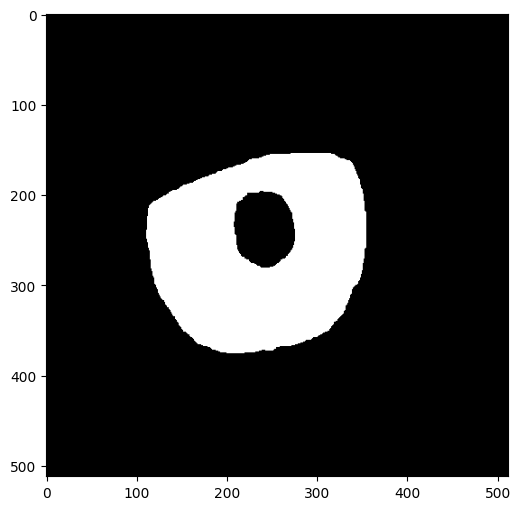

In [19]:
plt.figure(figsize=(6,6))
plt.imshow(np.reshape(y_train[image_number], (512,512)), cmap='gray')

plt.show()

In [16]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

In [17]:
print("IMAGE HEIGHT = ",IMG_HEIGHT)
print("IMAGE WIDTH = ",IMG_WIDTH)
print("IMAGE CHANNELS = ",IMG_CHANNELS)

IMAGE HEIGHT =  512
IMAGE WIDTH =  512
IMAGE CHANNELS =  1


In [18]:
def get_model():
    return u_net_model(IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)

In [19]:
model = get_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [24]:
history = model.fit(x_train,y_train,
                    batch_size = 4,
                    verbose=1,
                    epochs=30,
                    validation_data=(x_test,y_test),
                    shuffle=False)

Epoch 1/30
34/34 [==============================] - 41s 324ms/step - loss: 0.3920 - accuracy: 0.8392 - val_loss: 0.4205 - val_accuracy: 0.8301
Epoch 2/30
34/34 [==============================] - 7s 213ms/step - loss: 0.2472 - accuracy: 0.8421 - val_loss: 0.2732 - val_accuracy: 0.9086
Epoch 3/30
34/34 [==============================] - 7s 212ms/step - loss: 0.1414 - accuracy: 0.9458 - val_loss: 0.1837 - val_accuracy: 0.9106
Epoch 4/30
34/34 [==============================] - 7s 212ms/step - loss: 0.0705 - accuracy: 0.9741 - val_loss: 0.0684 - val_accuracy: 0.9746
Epoch 5/30
34/34 [==============================] - 7s 213ms/step - loss: 0.0555 - accuracy: 0.9782 - val_loss: 0.0628 - val_accuracy: 0.9778
Epoch 6/30
34/34 [==============================] - 7s 213ms/step - loss: 0.0446 - accuracy: 0.9821 - val_loss: 0.0485 - val_accuracy: 0.9808
Epoch 7/30
34/34 [==============================] - 7s 213ms/step - loss: 0.0353 - accuracy: 0.9854 - val_loss: 0.0465 - val_accuracy: 0.9823
Epoch

In [25]:
model.save("models/segmentation_model_1.h5")

In [26]:
model.save("models/segmentation_model_1.hdf5")

In [9]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [20]:
model.load_weights("models/segmentation_model_1.hdf5")

In [ ]:
model1 = tf.keras.models.load_model("models/segmentation_model_1.hdf5")

In [28]:
_, acc = model.evaluate(x_test,y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 5s 5s/step - loss: 0.0236 - accuracy: 0.9913
Accuracy =  99.12796020507812 %


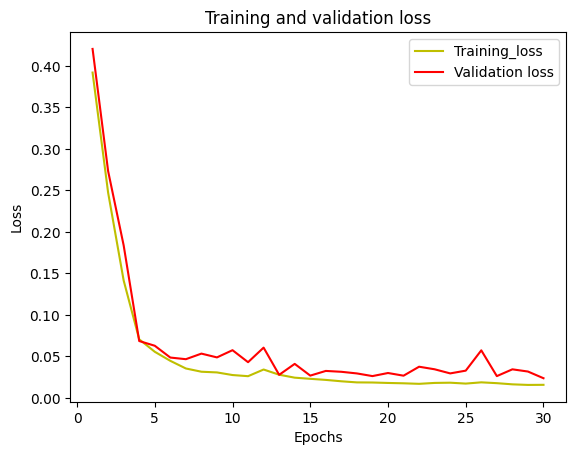

In [29]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training_loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

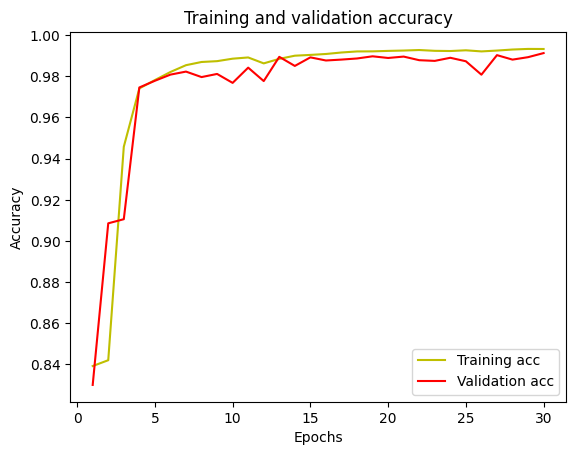

In [33]:
# acc = history.history['acc']
acc = history.history['accuracy']
# val_acc = history.history['val_acc']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
y_pred = model.predict(x_test)
y_pred_threshold = y_pred>0.5
intersection = np.logical_and(y_test,y_pred_threshold)
union = np.logical_or(y_test, y_pred_threshold)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

1/1 [==============================] - 1s 660ms/step
IoU socre is:  0.9495735294117648


In [21]:
model = get_model()
model.load_weights('models/segmentation_model_1.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 512, 512, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [23]:
import random

In [24]:
test_img_number = random.randint(0, len(x_test))
test_img = x_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm = test_img[:,:,0][:,:,None]
test_img_input = np.expand_dims(test_img_norm,0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

1/1 [==============================] - 6s 6s/step


In [75]:
test_img_other = cv2.imread('iris_dataset/test_file/Img_31_1_1.jpg', 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
test_img_other = Image.fromarray(test_img_other)
test_img_other = test_img_other.resize((SIZE,SIZE))
test_img_other = np.array(test_img_other)
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

In [76]:
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.2).astype(np.uint8)

1/1 [==============================] - 0s 24ms/step


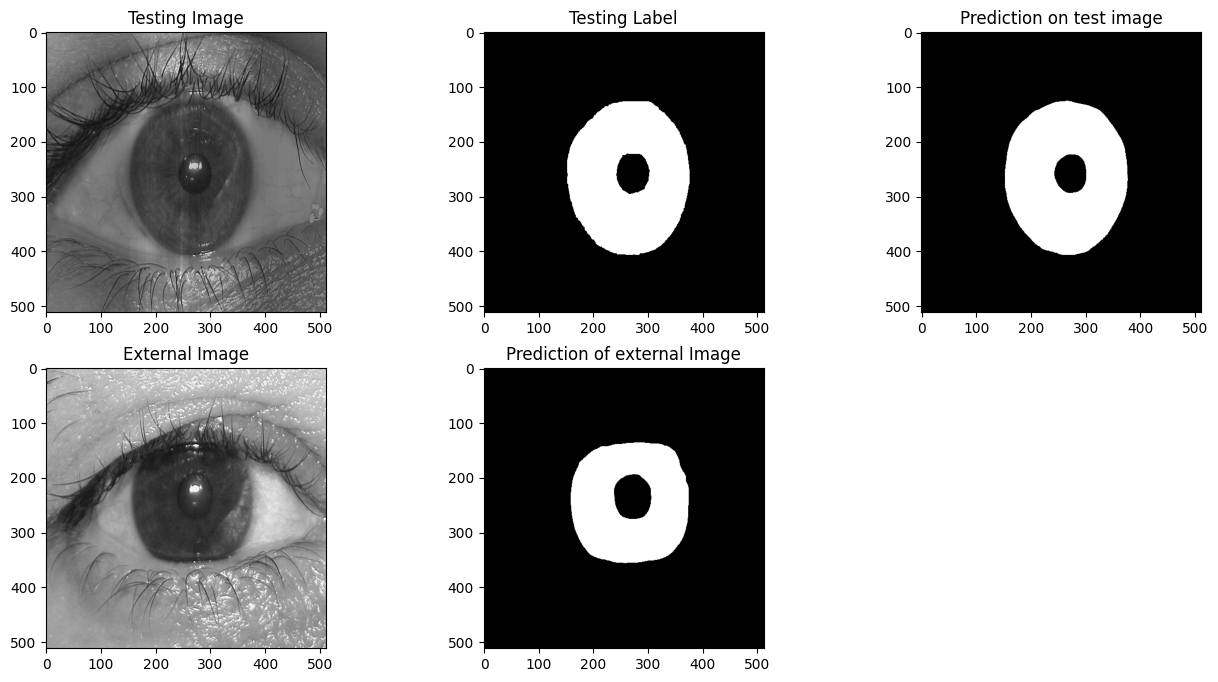

In [77]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()
